In [1]:
%load_ext autoreload

In [2]:
%autoreload 
import pandas as pd
import numpy as np
import h2o
from h2o.automl import H2OAutoML
import utilities as ut

Start h2o client

In [3]:
h2o.init(max_mem_size='13G')

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,4 hours 45 mins
H2O_cluster_timezone:,Europe/Oslo
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.1
H2O_cluster_version_age:,11 days
H2O_cluster_name:,H2O_from_python_henrikraa_mn6o67
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,9.78 Gb
H2O_cluster_total_cores:,12
H2O_cluster_allowed_cores:,12
H2O_cluster_status:,"locked, healthy"


In [4]:
data_path = 'training_data/hourly_mean/'
save_path = 'h20_models'

### Load data


In [5]:
y_train = pd.read_csv(f'{data_path}y_train_BC.csv')
X_train = pd.read_csv(f'{data_path}/X_train_selected_BC.csv')
X_test = pd.read_csv(f'{data_path}/X_test_selected_BC.csv')

y_train = y_train.set_index('date_forecast')
y_train.index = pd.to_datetime(y_train.index)

X_train = X_train.set_index('date_forecast')
X_train.index = pd.to_datetime(X_train.index)

df = pd.concat([X_train, y_train], axis=1)

In [6]:
df_h2o = h2o.H2OFrame(df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [7]:
df_h2o

sun_zenith:d,temp_solar_interaction,cumulative_precipitation,clear_sky_rad:W,day_of_year,year,pressure_100m:hPa,sun_equation_of_time,cloud_base_agl:m,t_1000hPa:K,visibility:m,absolute_humidity_2m:gm3,effective_cloud_cover:p,wind_speed_magnitude,pv_measurement
138.262,0,0.2,0,1,2019,974.1,-3.2033,1200.67,278.25,16827.8,5.525,81.825,2.80902,0
134.821,0,0.2,0,1,2019,973.25,-3.22311,1131.42,278.075,12777.5,5.425,97.475,3.54777,0
129.748,0,0.2,0,1,2019,973.05,-3.24292,1061,278.05,11140.5,5.4,96.425,4.04427,0
123.654,0,0.215,0,1,2019,973.35,-3.26271,1021.15,277.6,6799.2,5.35,96.775,4.93592,0
117.064,0,0.24,0,1,2019,973.875,-3.28249,1033.7,277.65,5580.48,5.675,96.725,6.05783,0
110.402,0,0.24,0,1,2019,974.725,-3.30227,1046.28,278.4,8248.95,5.95,96.025,5.98821,0
104.023,0,0.15,0,1,2019,975.9,-3.32204,1098.58,278.4,7299.38,5.9,97.975,5.24873,0
98.241,0,0.135,0,1,2019,977.4,-3.3418,1217.53,278.2,3803.9,5.95,99.55,5.53433,0
93.3506,0,0.36,0,1,2019,979.575,-3.36155,1337.3,277.85,3085.93,5.95,99.825,7.11663,0
89.1639,0,0.36,4.1,1,2019,982.775,-3.38129,1533.45,277.8,4995.88,5.775,99.775,7.59047,0


In [8]:
y = "pv_measurement"

x = list(df_h2o.columns)
x.remove(y)

In [9]:
# compare df_h2o.columns with x
print(df_h2o.columns)
print(x)

['sun_zenith:d', 'temp_solar_interaction', 'cumulative_precipitation', 'clear_sky_rad:W', 'day_of_year', 'year', 'pressure_100m:hPa', 'sun_equation_of_time', 'cloud_base_agl:m', 't_1000hPa:K', 'visibility:m', 'absolute_humidity_2m:gm3', 'effective_cloud_cover:p', 'wind_speed_magnitude', 'pv_measurement']
['sun_zenith:d', 'temp_solar_interaction', 'cumulative_precipitation', 'clear_sky_rad:W', 'day_of_year', 'year', 'pressure_100m:hPa', 'sun_equation_of_time', 'cloud_base_agl:m', 't_1000hPa:K', 'visibility:m', 'absolute_humidity_2m:gm3', 'effective_cloud_cover:p', 'wind_speed_magnitude']


## Run AutoML

In [10]:
aml = H2OAutoML(seed=1, stopping_metric='MAE')
aml.train(x=x, y=y, training_frame=df_h2o)

AutoML progress: |

███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),93/97
# GBM base models (used / total),57/60
# XGBoost base models (used / total),25/25
# DRF base models (used / total),2/2
# DeepLearning base models (used / total),8/9
# GLM base models (used / total),1/1
Metalearner algorithm,GBM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5


In [11]:
lb = aml.leaderboard
lb.head(rows=15)

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_AllModels_5_AutoML_2_20231027_101043,45.992,2115.26,20.2513,nan,2115.26
StackedEnsemble_AllModels_4_AutoML_2_20231027_101043,46.3914,2152.16,20.0308,nan,2152.16
StackedEnsemble_AllModels_3_AutoML_2_20231027_101043,46.4087,2153.77,20.033,nan,2153.77
StackedEnsemble_BestOfFamily_5_AutoML_2_20231027_101043,47.9454,2298.77,20.2695,nan,2298.77
StackedEnsemble_BestOfFamily_4_AutoML_2_20231027_101043,48.1771,2321.03,20.9687,nan,2321.03
XGBoost_grid_1_AutoML_2_20231027_101043_model_19,48.2985,2332.75,21.0129,nan,2332.75
XGBoost_grid_1_AutoML_2_20231027_101043_model_15,49.5073,2450.98,22.7014,nan,2450.98
XGBoost_grid_1_AutoML_2_20231027_101043_model_9,49.6503,2465.15,22.3108,nan,2465.15
XGBoost_grid_1_AutoML_2_20231027_101043_model_2,49.8945,2489.46,21.2907,nan,2489.46
StackedEnsemble_AllModels_2_AutoML_2_20231027_101043,50.3388,2534,22.5323,nan,2534


In [12]:
aml.leader #Best model

key,value
Stacking strategy,cross_validation
Number of base models (used / total),93/97
# GBM base models (used / total),57/60
# XGBoost base models (used / total),25/25
# DRF base models (used / total),2/2
# DeepLearning base models (used / total),8/9
# GLM base models (used / total),1/1
Metalearner algorithm,GBM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5


In [13]:
best_model = aml.leader
# in leaderboard, retrieve the model id of the best XGBoost model
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
best_xgb_model = h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])

In [14]:
best_xgb_model.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'XGBoost_grid_1_AutoML_2_20231027_101043_model_19',
   'type': 'Key<Model>',
   'URL': '/3/Models/XGBoost_grid_1_AutoML_2_20231027_101043_model_19'},
  'input': None},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_2_20231027_101043_training_Key_Frame__upload_af5ce22ff0eaf272e6f3acdc0087425c.hex',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_2_20231027_101043_training_Key_Frame__upload_af5ce22ff0eaf272e6f3acdc0087425c.hex'},
  'input': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_2_20231027_101043_training_Key_Frame__upload_af5ce22ff0eaf272e6f3acdc0087425c.hex',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_2_20231027_101043_tra

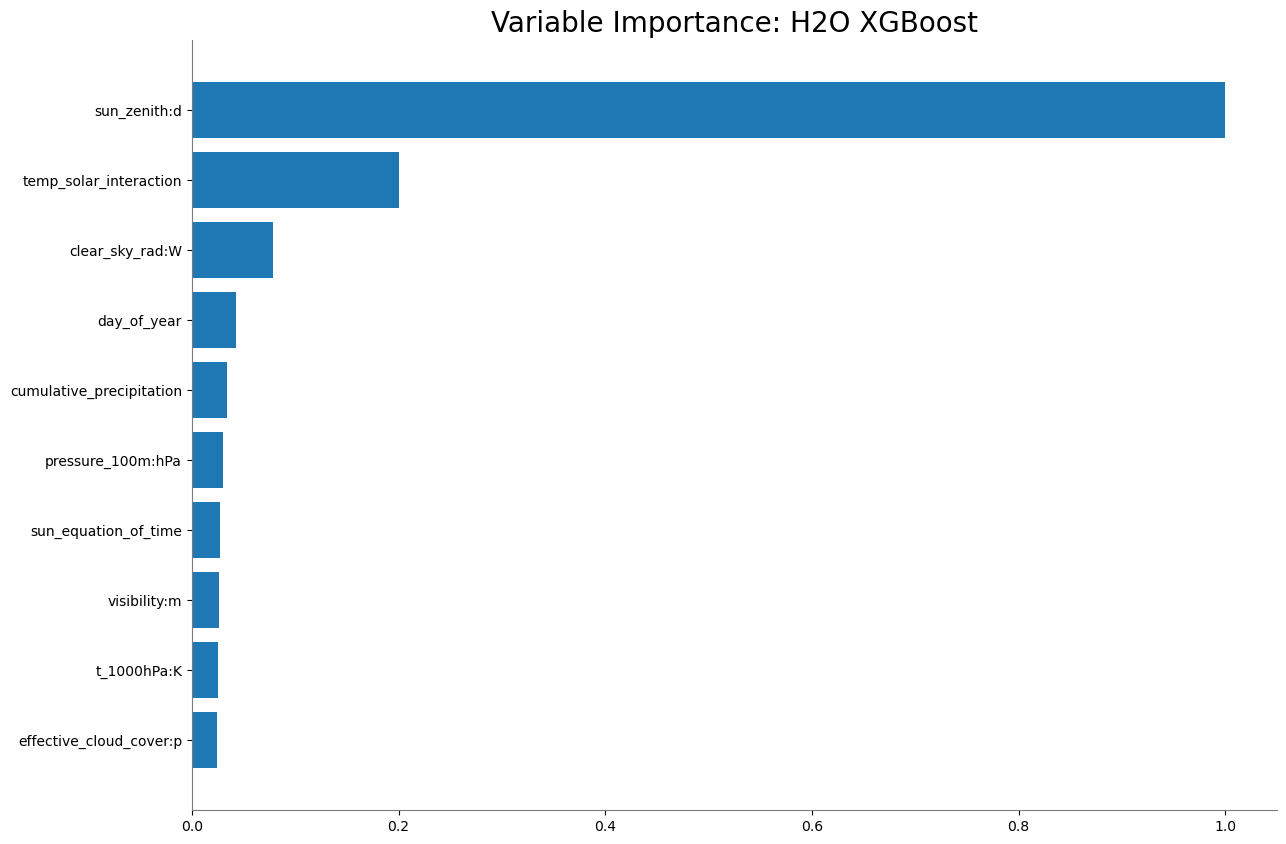

<Figure size 640x480 with 0 Axes>

In [15]:
best_xgb_model.varimp_plot()

In [16]:
# save the models
h2o.save_model(best_model, path = save_path, force=True, filename="1027_h_ensaemble_model_build_BC_feng_means")
h2o.save_model(best_xgb_model, path = save_path, force=True, filename="1027_h_xgboost_model_build_BC_feng_means")

'/home/henrikraa/git_repos/TDT4173-ML/h20_models/1027_h_xgboost_model_build_BC_feng_means'